Эркенова Джамиля, 15.11Д-ПМ03/19б

# Кластеризация данных пользователей кредитными картами

Необходимо объединить клиентов в однородные группы для определения маркетинговой стратегии.
Образец набора данных суммирует поведение пользователей примерно 9000 активных держателей кредитных карт за последние 6 месяцев.

# Описание датасета

Импортируем библиотеки и датасет:

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA 

In [6]:
df = pd.read_csv('CC GENERAL (1).csv')

Рассмотрим полученные данные

In [7]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Где:
* CUSTID : Identification of Credit Card holder (Categorical)
* BALANCE : Сумма баланса, оставшаяся на их счете для совершения покупок
* BALANCEFREQUENCY : Как часто обновляется баланс, оценка от 0 до 1 (1 = часто обновляется, 0 = не часто обновляется)
* PURCHASES : Сумма покупок, совершенных со счета
* ONEOFFPURCHASES : Максимальная сумма покупки, совершенная за один раз
* INSTALLMENTSPURCHASES : Сумма покупки, совершенной в рассрочку
* CASHADVANCE : Наличные деньги авансом, предоставленные пользователем
* PURCHASESFREQUENCY : Как часто совершаются покупки, - оценка от 0 до 1 (1 = часто совершаемые покупки, 0 = не часто совершаемые покупки)
* ONEOFFPURCHASESFREQUENCY : Как часто покупки совершаются за один раз (1 = часто приобретаемые, 0 = не часто приобретаемые)
* PURCHASESINSTALLMENTSFREQUENCY : Как часто совершаются покупки в рассрочку (1 = часто совершается, 0 = не часто совершается)
* CASHADVANCEFREQUENCY : Как часто выплачиваются авансовые платежи наличными
* CASHADVANCETRX : Количество транзакций, совершенных с помощью "Cash in Advanced"
* PURCHASESTRX : Количество совершенных сделок покупки
* CREDITLIMIT : Лимит кредитной карты для пользователя
* PAYMENTS : Сумма платежа, произведенного пользователем
* MINIMUM_PAYMENTS : Минимальная сумма платежей, произведенных пользователем
* PRCFULLPAYMENT : Процент от полной оплаты, уплаченной пользователем
* TENURE : Срок действия услуги кредитной карты для пользователя

In [8]:
df.shape

(8950, 18)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

8950 записей в датасете. Можно отметить пропуски в полях "MINIMUM_PAYMENTS" и "CREDIT_LIMIT". Всего пропусков:

In [10]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
# в процентах
df.isna().sum()/df.shape[0]*100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

Процент данных с пропусками не велик, можно ими пренебречь.

Описательная статистика

In [12]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Можно отметить сильный дисбаланс максимальных значений относительно квантилей и среднего значения в полях "PURCHASES", "CASH_ADVANCE", "INSTALLMENTS_PURCHASES", "ONEOFF_PURCHASES", "PAYMENTS", "MINIMUM_PAYMENTS", "PURCHASES_TRX", "CASH_ADVANCE_TRX" похожих на выбросы.

Половина пользователей не пользуется рассрочкой. Из оставшихся пользователей всего 15% полностью погасили займ.


# Обработка данных

Очистим данные от пустых значений, удалив объекты с пропусками:

In [13]:
df.dropna(inplace=True)

Удалим столбец CUST_ID

In [14]:
df = df.drop(['CUST_ID'],axis = 1)

In [15]:
df.shape

(8636, 17)

In [16]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Построим гистограммы распределений признаков

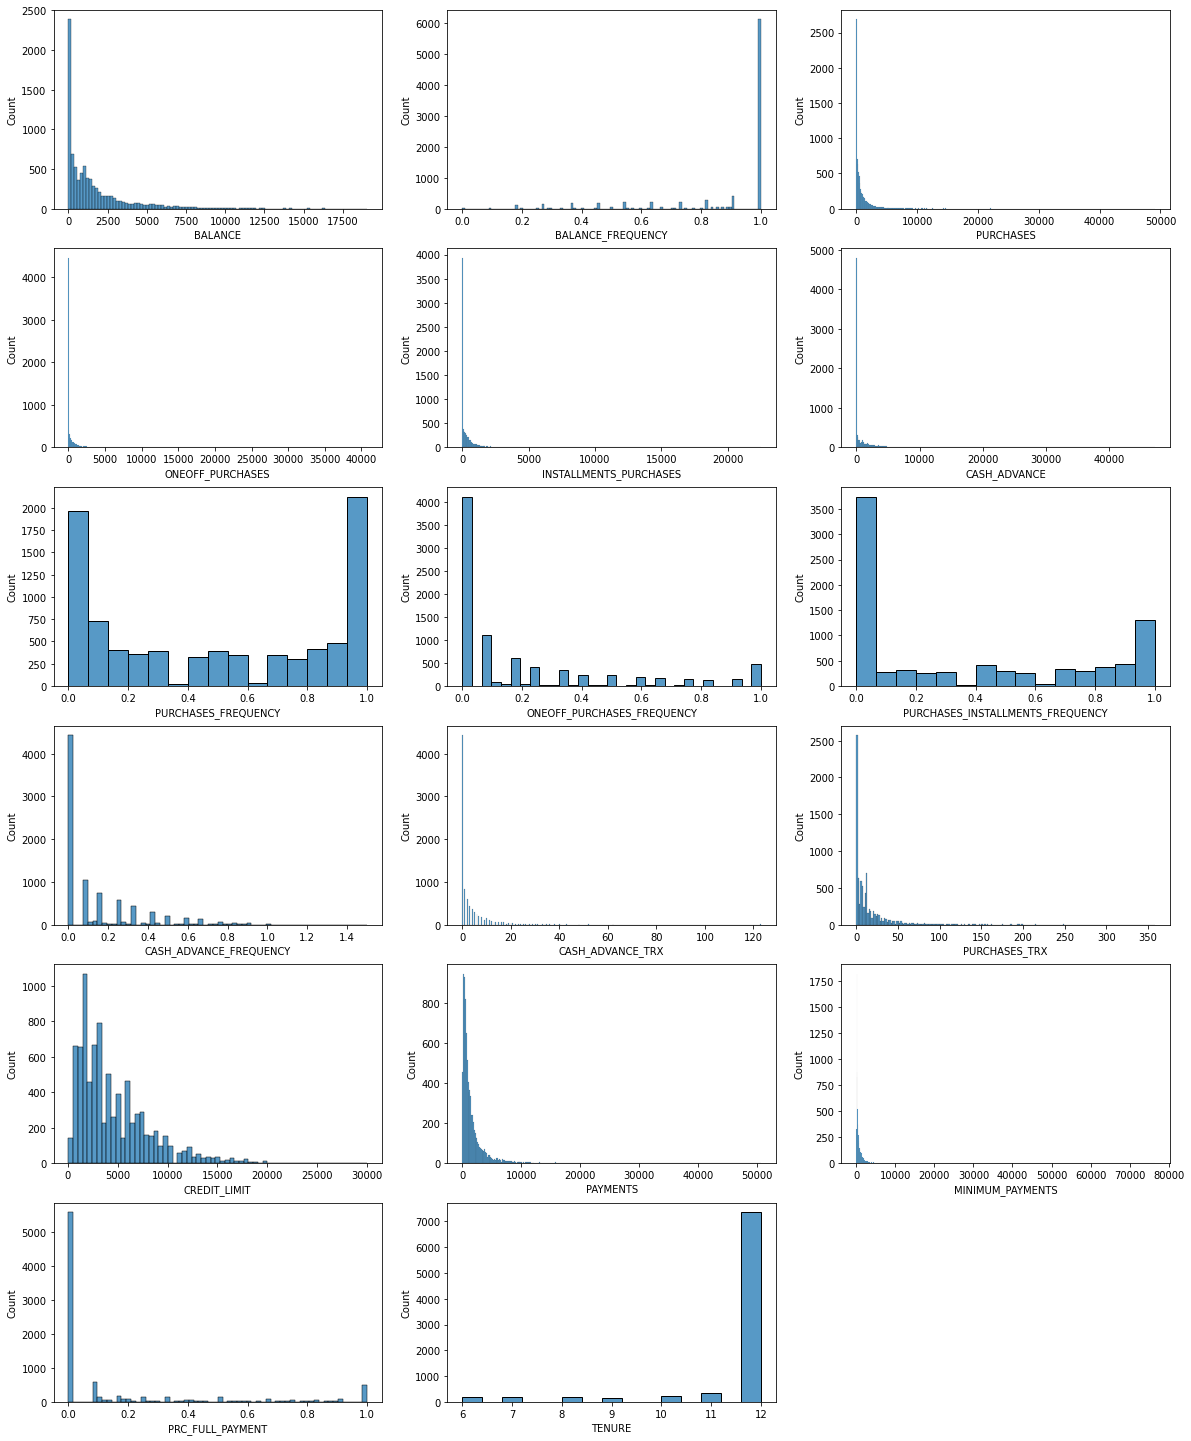

In [17]:
fig = plt.figure(figsize = (20,30))
for i, v in enumerate(df.columns):
    axes = fig.add_subplot(7, 3, i+1)
    sns.histplot(df[v], ax = axes)

Здесь мы наблюдаем следующие тенденции :

Большинство держателей кредитных карт имеют низкий кредитный лимит и поддерживают кредитный баланс ниже 7500


Переменные, такие как Покупки, Разовые покупки, покупки в рассрочку и авансы наличными, также следуют той же тенденции, что и кредитный баланс. Все они могут быть связаны. То есть, поскольку кредитный баланс невелик, покупки также невелики и так далее


Большинство людей либо ничего не покупают, либо покупают очень часто


Людей, которые покупают в рассрочку, больше, чем людей, которые покупают за один раз


За последние 6 месяцев большинство людей произвели общие платежи ниже 10000, при этом минимальные платежи были ниже 5000


Наконец, большинство владельцев кредитных карт владеют картой более 12 месяцев

**Рассмотрим поля с выбросами:**

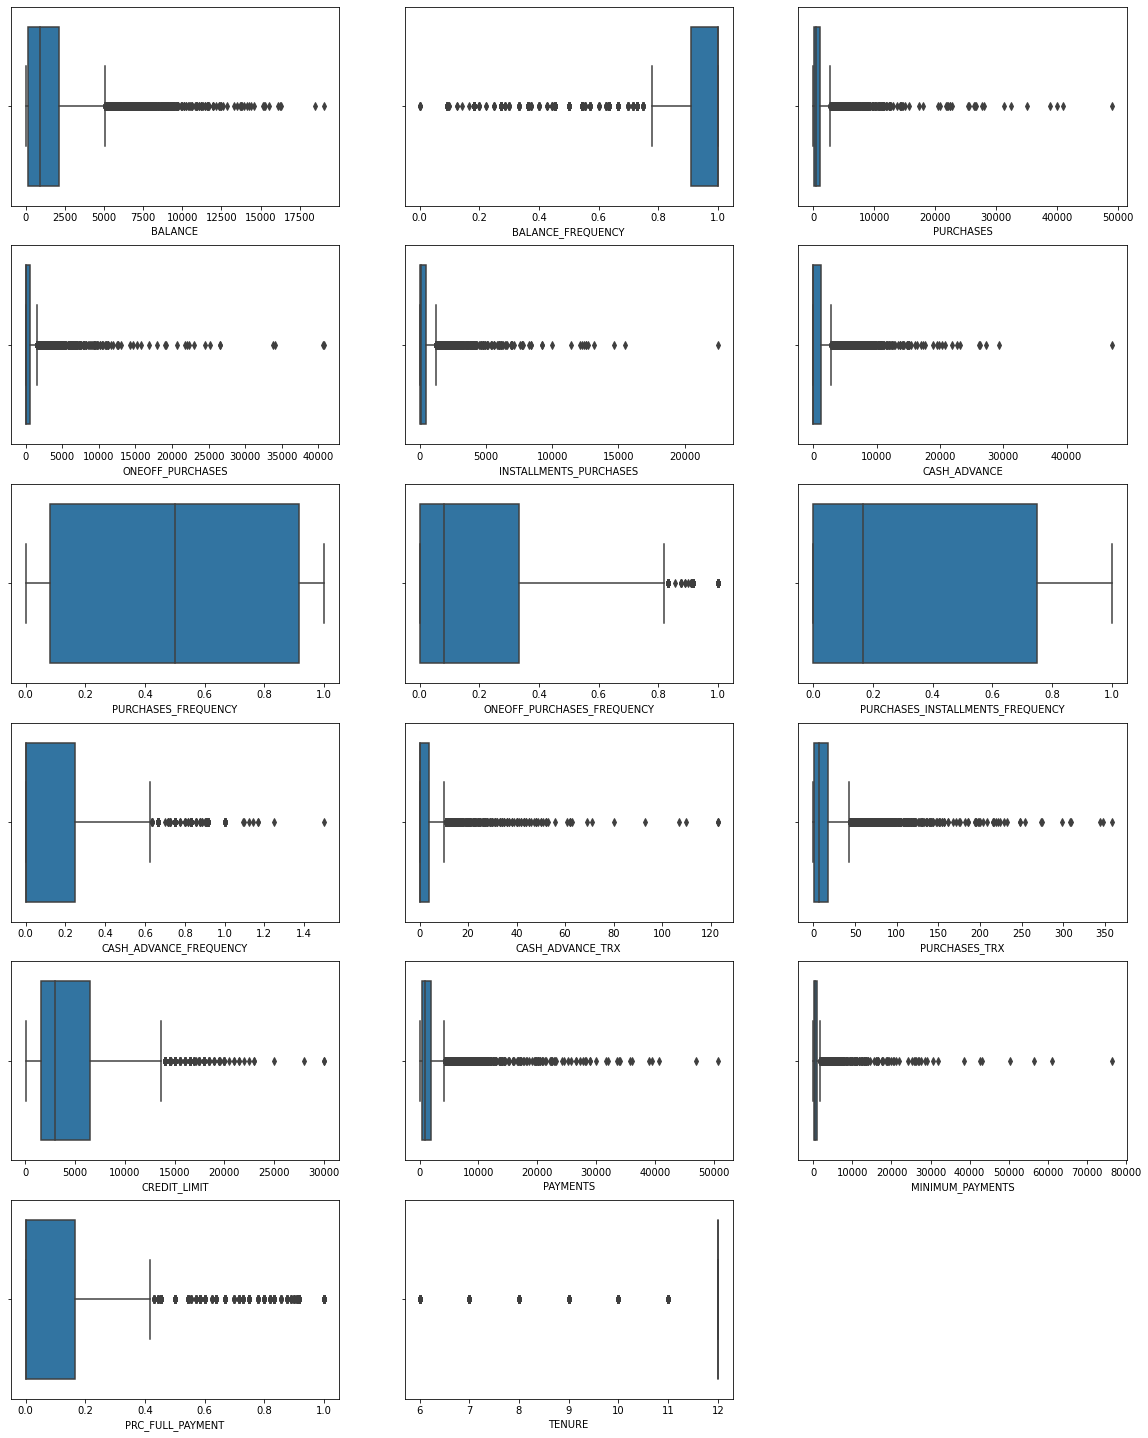

In [18]:
fig = plt.figure(figsize = (20,30))
for i, v in enumerate(df.columns):
    axes = fig.add_subplot(7, 3, i+1)
    sns.boxplot(df[v], ax = axes)

Мы наблюдаем здесь много выбросов, поэтому удалять эти выбросы не рекомендуется. Мы могли бы удалить точки выбросов, если бы количество выбросов было меньше. Здесь мы будем избегать удаления записей с выбросами. Что мы можем сделать здесь, так это нормализовать данные.

**Скорректируем датасет исходя из наблюдений выше:**

In [19]:
#clear_df = df[(df['PURCHASES']<3000) & \
 #  (df['CASH_ADVANCE']<2000) &\
  # (df['INSTALLMENTS_PURCHASES']<1000) &\
   #(df['ONEOFF_PURCHASES']<1500) &\
   #(df['PAYMENTS']<3000) &\
   #(df['MINIMUM_PAYMENTS']<1500) &\
   #(df['PURCHASES_TRX']<50) &\
   #(df['CASH_ADVANCE_TRX']<10)
  #]
#clear_df.describe()
#clear_df.shape

Построим графики плотностей распределений данных

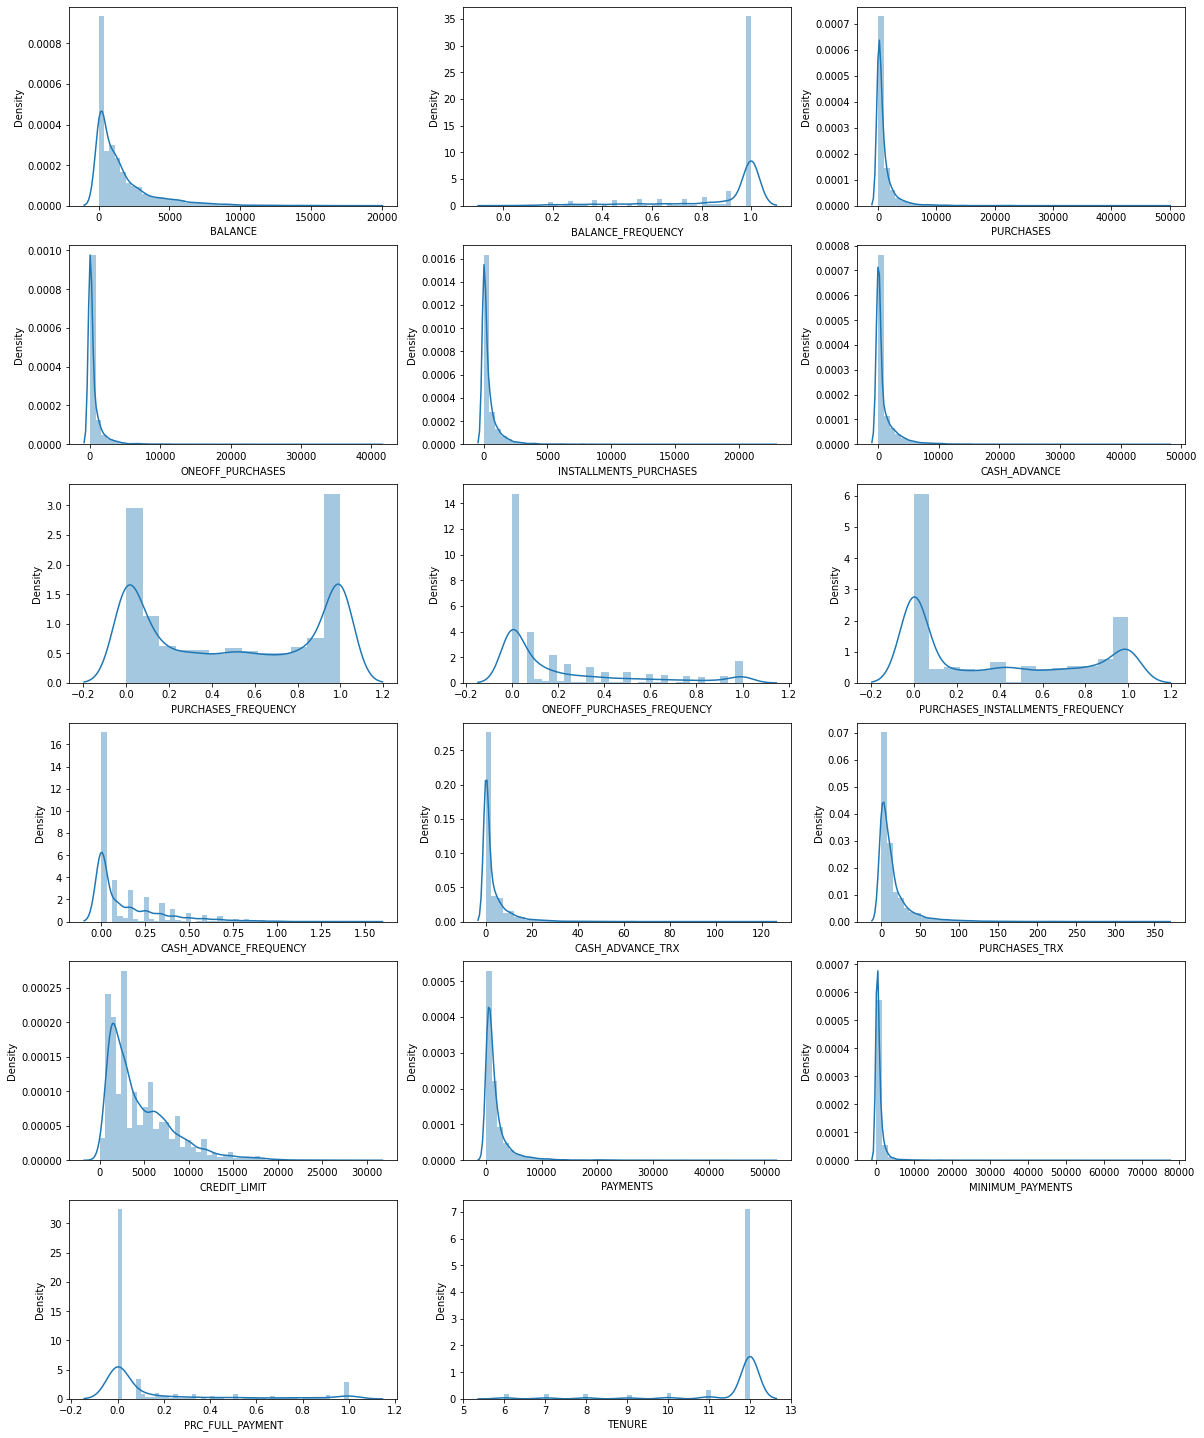

In [20]:
fig = plt.figure(figsize = (20,30))
for i, v in enumerate(df.columns):
    axes = fig.add_subplot(7, 3, i+1)
    sns.distplot(df[v], ax = axes)

Стандартизируем данные:

In [21]:
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df)

# Retransform numpy array to pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns = df.columns)
scaled_df.head()
scaled_df.describe()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03
mean,-2.506872e-18,-5.691243e-15,4.031476e-16,-5.819743e-15,2.643555e-15,-4.502548e-15,-2.185028e-16,-8.273836e-15,-2.426601e-15,1.812520e-15,-6.369898e-16,-2.611357e-15,5.480666e-16,4.343960e-17,1.740219e-16,-3.688766e-15,-2.976776e-15
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00
min,-7.641437e-01,-4.309583e+00,-4.732082e-01,-3.591603e-01,-4.588390e-01,-4.686555e-01,-1.236139e+00,-6.862796e-01,-9.265216e-01,-6.819525e-01,-4.794369e-01,-5.970542e-01,-1.222207e+00,-6.132812e-01,-3.643042e-01,-5.377269e-01,-4.221800e+00
25%,-6.934691e-01,6.767893e-02,-4.531953e-01,-3.591603e-01,-4.588390e-01,-4.686555e-01,-1.028455e+00,-6.862796e-01,-9.265216e-01,-6.819525e-01,-4.794369e-01,-5.573385e-01,-7.985975e-01,-4.694457e-01,-2.930083e-01,-5.377269e-01,3.551807e-01
50%,-3.265978e-01,5.054046e-01,-2.999696e-01,-3.324445e-01,-3.554965e-01,-4.686555e-01,9.968862e-03,-4.085365e-01,-5.078338e-01,-6.819525e-01,-4.794369e-01,-3.190448e-01,-4.159823e-01,-3.051243e-01,-2.326108e-01,-5.377269e-01,3.551807e-01
75%,2.405073e-01,5.054046e-01,5.562856e-02,-3.444604e-03,6.901931e-02,6.515234e-02,1.048393e+00,4.246962e-01,9.575697e-01,5.570222e-01,9.925796e-02,1.178270e-01,5.405558e-01,5.727990e-02,-1.635812e-02,2.485496e-02,3.551807e-01
max,8.323708e+00,5.054046e-01,2.215714e+01,2.384284e+01,2.407255e+01,2.175188e+01,1.256077e+00,2.646651e+00,1.585600e+00,6.751896e+00,1.731543e+01,1.362114e+01,6.963026e+00,1.681891e+01,3.184159e+01,2.837758e+00,3.551807e-01


# K-means и поиск оптимального числа кластеров методом локтя

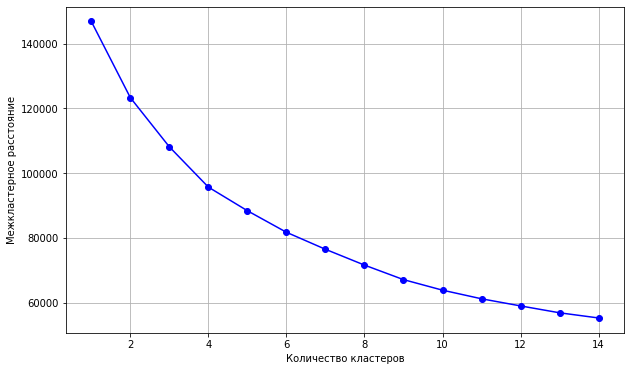

In [22]:
interclusterdistance = []

for clusters in range(1,15):
    km = KMeans(n_clusters = clusters,init ='k-means++', max_iter=300,random_state=42)
    km.fit(scaled_df)
    interclusterdistance.append(km.inertia_)
    
#plotting the values
plt.figure(figsize=(10,6))
plt.plot(range(1, 15), interclusterdistance, marker='o', color='b')
plt.xlabel('Количество кластеров')
plt.ylabel('Межкластерное расстояние')
plt.grid()
plt.show()

Мы наблюдаем, что до k = 6 межкластерное расстояние значительно уменьшается. Сформируем 6 кластеров.

In [23]:
cluster_km = KMeans(n_clusters = 6)
kmeans = cluster_km.fit_predict(scaled_df)

Проверим, верно ли выбрано число кластеров

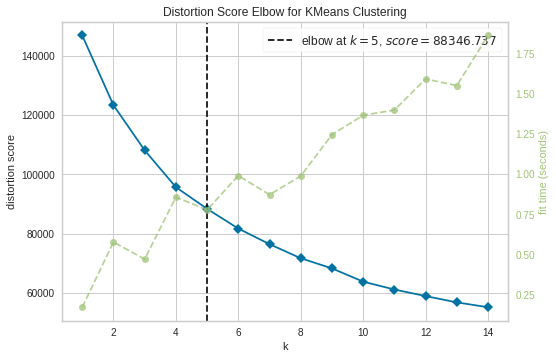

In [24]:
from yellowbrick.cluster import KElbowVisualizer, ClusteringScoreVisualizer
vis_elbow = KElbowVisualizer(cluster_km, k = (1,15))
vis_elbow.fit(scaled_df)
vis_elbow.poof()

Оптимальное число кластеров равно 5

In [25]:
cluster_km = KMeans(n_clusters = 5)
kmeans = cluster_km.fit_predict(scaled_df)

Вычислим центры кластеров

In [26]:
centers = cluster_km.cluster_centers_
print(centers)

[[-0.45010959  0.11707299 -0.10132801 -0.25889372  0.23621691 -0.38062602
   0.90503656 -0.40203682  1.0728524  -0.48707111 -0.37342972  0.07068279
  -0.356226   -0.28444851 -0.080508    0.39995309 -0.05879625]
 [-0.23504855 -0.33277341 -0.34003745 -0.22111585 -0.39746321 -0.17175053
  -0.81583254 -0.35295804 -0.75535213 -0.07184494 -0.14779193 -0.47415656
  -0.32543937 -0.25333821 -0.11657497 -0.28006059 -0.03100339]
 [ 1.46228047  0.3520311  -0.24772455 -0.18222984 -0.25089672  1.75173473
  -0.53100678 -0.24586091 -0.46684198  1.77120692  1.67456481 -0.30287104
   0.84889975  0.65261945  0.49651573 -0.413235   -0.12253743]
 [ 0.14970252  0.4100326   0.89535611  0.83343573  0.58512325 -0.29810851
   1.07125337  1.75298587  0.56638106 -0.39038037 -0.30900082  1.15493362
   0.69171297  0.36596326 -0.00767323  0.37628635  0.26649253]
 [ 1.38399147  0.38743216  6.96759786  6.13878729  5.18903626  0.02819598
   1.07321283  1.869337    1.03290546 -0.25888804 -0.05423732  4.66720277
   2.141

Добавим в датасет столбец с номером кластера пользователя кредитной карты

In [27]:
cluster_df = pd.DataFrame(scaled_df, columns=scaled_df.columns).copy()
cluster_df['cluster_km'] = kmeans
cluster_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_km
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181,1
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181,2
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181,3
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181,1
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181,0


Определим количество пользователей кредитными картами в каждом кластере

In [28]:
cluster_df['cluster_km'].value_counts()

1    3757
0    2333
3    1359
2    1105
4      82
Name: cluster_km, dtype: int64

Здесь мы наблюдаем, что большинство клиентов попадают в 1-й кластер, в то время как 4-й кластер содержит наименьшее количество клиентов.

Поскольку кластеризация выполняется по нескольким столбцам, мы не можем визуализировать данные, поскольку можно визуализировать только двумерные данные.

Давайте попробуем визуализировать, используя две переменные, такие как BALANCE и PURCHASES:

Text(0.5, 1.0, 'K_means')

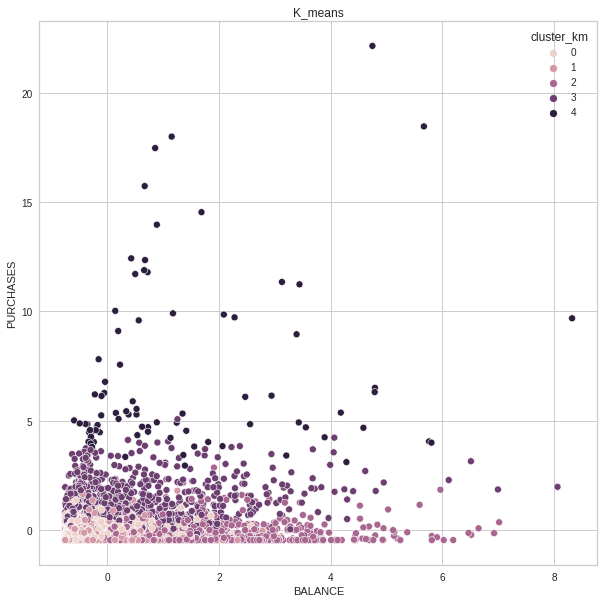

In [29]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = cluster_df, x = cluster_df['BALANCE'], y =cluster_df['PURCHASES'], hue =cluster_df['cluster_km'] )
plt.title('K_means')

# Агломеративная кластеризация и поиск оптимального числа кластеров с построением дендрограммы

In [30]:
linkage_df = linkage(scaled_df, method = 'ward')

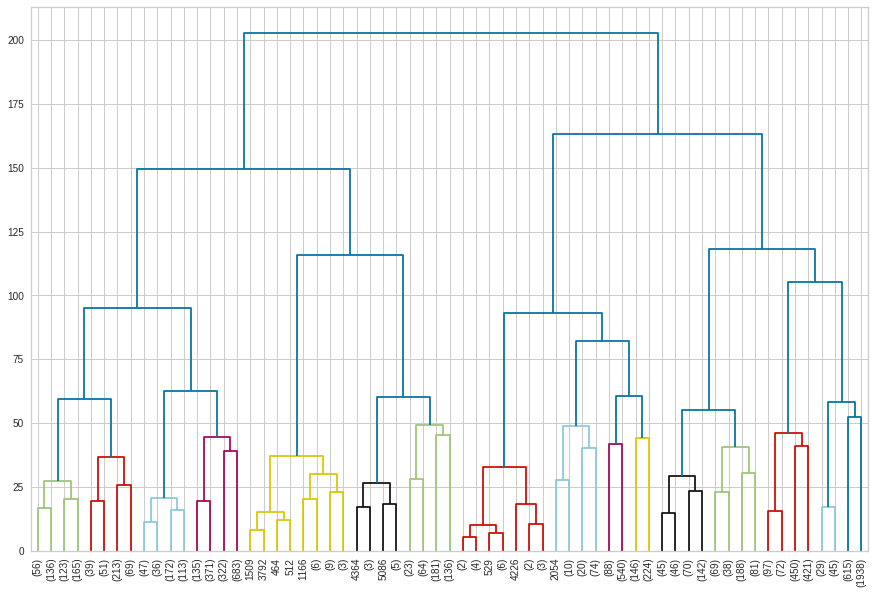

In [31]:
plt.figure(figsize=(15,10))
dendrogram(linkage_df, leaf_rotation = 90, p = 5, color_threshold=50, leaf_font_size=10, truncate_mode='level')
plt.show()

Визуально оптимальное число кластеров согласно этому алгоритму 6 или 7.

In [32]:
aggl = AgglomerativeClustering(n_clusters=6)
aggl = aggl.fit_predict(scaled_df)

In [33]:
#cluster_df = pd.DataFrame(scaled_df, columns = scaled_df.columns)
cluster_df['cluster_aggl'] = aggl
cluster_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_km,cluster_aggl
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181,1,0
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181,2,2
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181,3,1
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181,1,0
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181,0,0


In [34]:
cluster_df['cluster_aggl'].value_counts()

0    3667
1    2731
2    1122
4     679
3     414
5      23
Name: cluster_aggl, dtype: int64

Text(0.5, 1.0, 'Agglomerative Clustering')

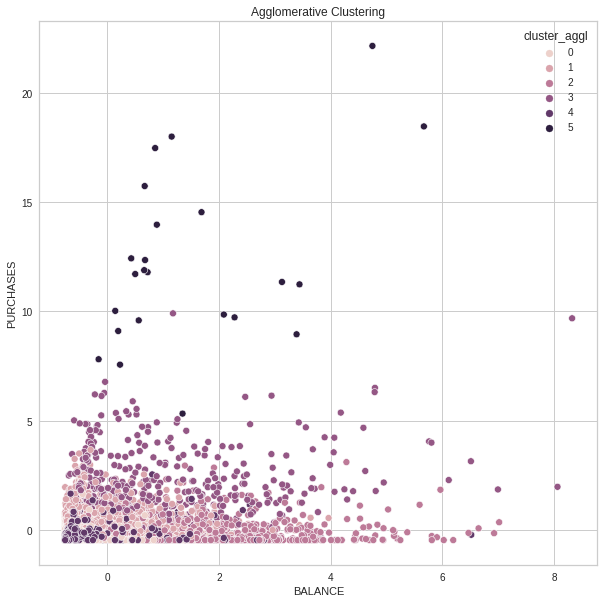

In [35]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = cluster_df, x = cluster_df['BALANCE'], y =cluster_df['PURCHASES'], hue =cluster_df['cluster_aggl'] )
plt.title('Agglomerative Clustering')

# DBSCAN

In [36]:
dbscan = DBSCAN(eps = 2, min_samples= 8)
dbscan= dbscan.fit_predict(scaled_df)

In [37]:
cluster_df['cluster_dbscan'] = dbscan
cluster_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_km,cluster_aggl,cluster_dbscan
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181,1,0,0
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181,2,2,0
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181,3,1,0
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181,1,0,0
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181,0,0,0


In [38]:
cluster_df['cluster_dbscan'].value_counts()

 0    7967
-1     669
Name: cluster_dbscan, dtype: int64

Text(0.5, 1.0, 'DBSCAN')

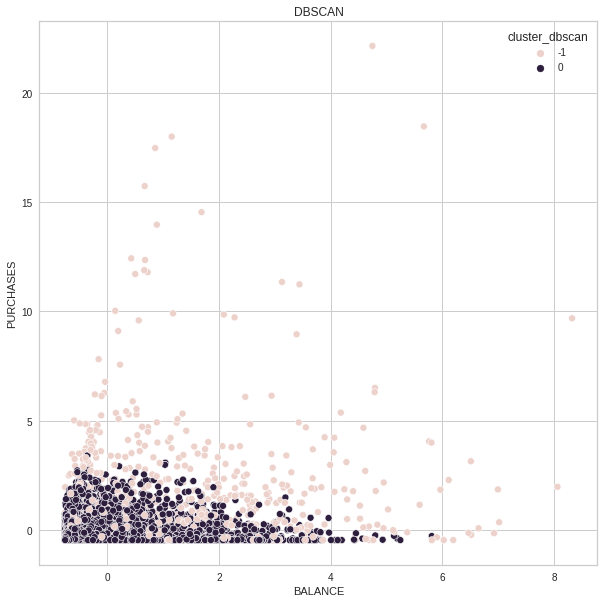

In [39]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = cluster_df, x = cluster_df['BALANCE'], y =cluster_df['PURCHASES'], hue =cluster_df['cluster_dbscan'] )
plt.title('DBSCAN')

# Оценка результата

Для визуализации кластеризации уменьшим размерность данных методом главных компонент:

In [40]:
pca = PCA(n_components=2)
pca_model = pca.fit_transform(scaled_df)

In [41]:
scaled_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181


In [42]:
pca_df = pd.DataFrame(data = pca_model, columns=['comp1', 'comp2'])
pca_df.head()

,comp1,comp2
0,-1.696395,-1.122585
1,-1.215682,2.435621
2,0.935854,-0.385199
3,-1.614638,-0.724582
4,0.223701,-0.783609


In [43]:
pca_df['km_cl'] = kmeans

Text(0.5, 1.0, 'K_means')

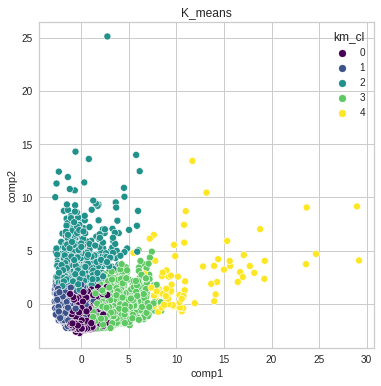

In [44]:
plt.figure(figsize=(6,6))
sns.scatterplot(data = pca_df, x = 'comp1', y = 'comp2', hue = 'km_cl', palette = 'viridis')
plt.title('K_means')

In [45]:
pca_df['aggl_cl'] = aggl

Text(0.5, 1.0, 'Agglomerative Clustering')

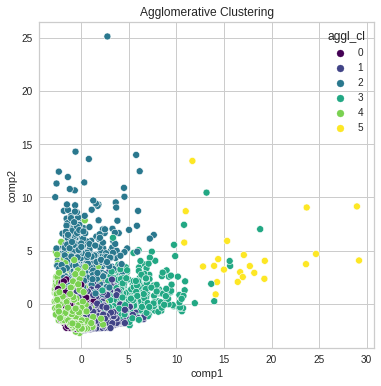

In [46]:
plt.figure(figsize=(6,6))
sns.scatterplot(data = pca_df, x = 'comp1', y = 'comp2', hue = 'aggl_cl', palette = 'viridis')
plt.title('Agglomerative Clustering')

In [47]:
pca_df['dbscan_cl'] = dbscan

Text(0.5, 1.0, 'DBSCAN')

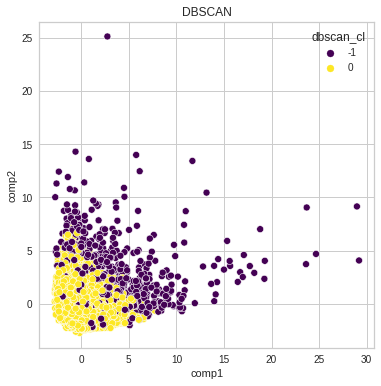

In [48]:
plt.figure(figsize=(6,6))
sns.scatterplot(data = pca_df, x = 'comp1', y = 'comp2', hue = 'dbscan_cl', palette = 'viridis')
plt.title('DBSCAN')

**Визуально K-means выглядит более предпочтительным вариантом. Проверим работу класетризаторов с помощью метрик:**

Так как у нас нет целевых меток, мы не можем использовать метрики, поэтому используем оценку силуэта: silhouette_score

Коэффициент силуэта рассчитывается с использованием среднего расстояния внутри кластера (a) и среднего расстояния до ближайшего кластера (b) для каждой выборки.

Лучшее значение равно 1, а худшее значение равно -1. Значения около 0 указывают на перекрывающиеся кластеры. Отрицательные значения обычно указывают на то, что образец был отнесен к неправильному кластеру, так как другой кластер более похож

In [49]:
from sklearn.metrics import silhouette_score

In [50]:
print('Метрика silhouette_score:')
print('Оценка K-Mean: {}'.format(silhouette_score(pca_df[['comp1', 'comp2']], pca_df['km_cl'])))
print('Оценка Agglomerative Clustering: {}'.format(silhouette_score(pca_df[['comp1', 'comp2']], pca_df['aggl_cl'])))
print('Оценка DBSCAN: {}'.format(silhouette_score(pca_df[['comp1', 'comp2']], pca_df['dbscan_cl'])))

Метрика silhouette_score:
Оценка K-Mean: 0.30729999934983887
Оценка Agglomerative Clustering: 0.21836097758157144
Оценка DBSCAN: 0.5261818767557104


Согласно оценке лучший результат показывает DBSCAN

# Группировка кластеров

In [51]:
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_km,cluster_aggl,cluster_dbscan
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181,1,0,0
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181,2,2,0
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181,3,1,0
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181,1,0,0
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,-0.761342,-1.902089,-0.463563,-0.346751,-0.458839,-0.468655,-0.820769,-0.130790,-0.926522,-0.681953,-0.479437,-0.557339,-1.099224,-0.593143,-0.345988,-0.537727,-4.221800,1,4,0
8632,-0.750546,0.505405,-0.338865,-0.359160,-0.141436,-0.468655,1.256077,-0.686280,1.166912,-0.681953,-0.479437,-0.358760,-0.962575,-0.501396,-0.343706,1.150015,-4.221800,0,4,0
8633,-0.752977,-0.297095,-0.406572,-0.359160,-0.301402,-0.468655,0.840707,-0.686280,0.748227,-0.681953,-0.479437,-0.398476,-0.962575,-0.585367,-0.329572,0.306144,-4.221800,0,4,0
8634,-0.757721,-0.297095,-0.473208,-0.359160,-0.458839,-0.451422,-1.236139,-0.686280,-0.926522,0.144032,-0.190089,-0.597054,-1.099224,-0.595238,-0.340811,0.306144,-4.221800,1,4,0


In [52]:
cluster_df_dbscan_0 = cluster_df[cluster_df['cluster_dbscan'] == 0]
cluster_df_dbscan_0.drop(columns = ['cluster_km', 'cluster_dbscan'], inplace = True)
cluster_df_dbscan_0.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_aggl
count,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000
mean,-0.104789,-0.011209,-0.131245,-0.112331,-0.103868,-0.098731,-0.042063,-0.066325,-0.034656,-0.066891,-0.092484,-0.117077,-0.110833,-0.154536,-0.086009,-0.013126,0.020156,0.927200
std,0.830297,1.011512,0.486166,0.473765,0.589013,0.704127,0.994470,0.947189,0.989142,0.900696,0.684211,0.663785,0.873502,0.512945,0.489602,0.986560,0.967584,1.153202
min,-0.764144,-4.309583,-0.473208,-0.359160,-0.458839,-0.468655,-1.236139,-0.686280,-0.926522,-0.681953,-0.479437,-0.597054,-1.222207,-0.613281,-0.364304,-0.537727,-4.221800,0.000000
25%,-0.703935,0.067679,-0.459389,-0.359160,-0.458839,-0.468655,-1.028455,-0.686280,-0.926522,-0.681953,-0.479437,-0.557339,-0.825927,-0.477661,-0.294327,-0.537727,0.355181,0.000000
50%,-0.368329,0.505405,-0.316719,-0.351442,-0.372499,-0.468655,-0.168048,-0.408536,-0.507834,-0.681953,-0.479437,-0.319045,-0.415982,-0.334220,-0.243657,-0.537727,0.355181,1.000000
75%,0.119740,0.505405,-0.016022,-0.071387,0.015533,-0.011082,1.048393,0.146953,0.957570,0.144032,0.099258,-0.001320,0.403907,-0.036204,-0.058107,0.024855,0.355181,1.000000
max,5.809500,0.505405,3.401968,3.711739,4.489786,5.436818,1.256077,2.646651,1.585600,4.273946,5.886206,5.519151,5.049949,3.820989,7.093478,2.837758,0.355181,4.000000


In [53]:
cluster_df_dbscan_1 = cluster_df[cluster_df['cluster_dbscan'] == -1]
cluster_df_dbscan_1.drop(columns = ['cluster_km', 'cluster_dbscan'], inplace = True)
cluster_df_dbscan_1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_aggl
count,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000
mean,1.247918,0.133491,1.562968,1.337735,1.236945,1.175775,0.500917,0.789851,0.412716,0.796596,1.101377,1.394248,1.319888,1.840341,1.024264,0.156316,-0.240032,2.482810
std,1.736788,0.841127,2.730858,2.882499,2.670185,2.348391,0.928512,1.245808,1.037134,1.601545,2.455318,2.358703,1.392113,2.472598,2.988419,1.137919,1.304239,1.105953
min,-0.762052,-3.871857,-0.473208,-0.359160,-0.458839,-0.468655,-1.236139,-0.686280,-0.926522,-0.681953,-0.479437,-0.597054,-1.099224,-0.597156,-0.358406,-0.537727,-4.221800,0.000000
25%,-0.223741,0.067679,-0.206173,-0.346003,-0.458839,-0.468655,-0.197715,-0.408536,-0.926522,-0.681953,-0.479437,-0.319045,0.403907,0.160669,-0.193681,-0.537727,0.355181,2.000000
50%,0.832321,0.505405,0.687272,0.286864,0.194536,0.312662,0.979164,0.702443,0.538882,0.144032,0.099258,0.554699,1.223797,1.083525,0.144136,-0.537727,0.355181,2.000000
75%,2.276818,0.505405,2.322398,1.745274,1.751080,1.962435,1.256077,1.980065,1.585600,1.795997,1.690669,2.421333,2.043687,2.588426,0.804877,0.306144,0.355181,3.000000
max,8.323708,0.505405,22.157141,23.842835,24.072555,21.751881,1.256077,2.646651,1.585600,6.751896,17.315429,13.621138,6.963026,16.818912,31.841586,2.837758,0.355181,5.000000


Группа лиц (-1) в среднем больше пользуется деньгами, взятыми в кредит. Об этом говорят такие параметры, как Баланс, Покупки и т.п.